# Zadanie 1

Porównać w języku Julia reprezentację bitową liczby 1/3 dla `Float16`, `Float32`, `Float64` oraz liczby, 
która jest inicjalizowana jako `Float16`, a potem rzutowana na `Float64`.

In [1]:
bitstring(Float16(1/3))

"0011010101010101"

In [2]:
bitstring(Float32(1/3))

"00111110101010101010101010101011"

In [3]:
bitstring(Float64(1/3))

"0011111111010101010101010101010101010101010101010101010101010101"

In [4]:
x = Float16(3.1)
Float64(x)

3.099609375

# Zadanie 2
Zbadać, jak zmienia się odległość między kolejnymi liczbami zminnoprzecinkowymi 
reprezentowanymi w komputerze za pomocą języka Julia. 
Narysować wykres używając Plots zależności odległości od wartości liczby dla zakresu  od 1.0 do 1000000.0.

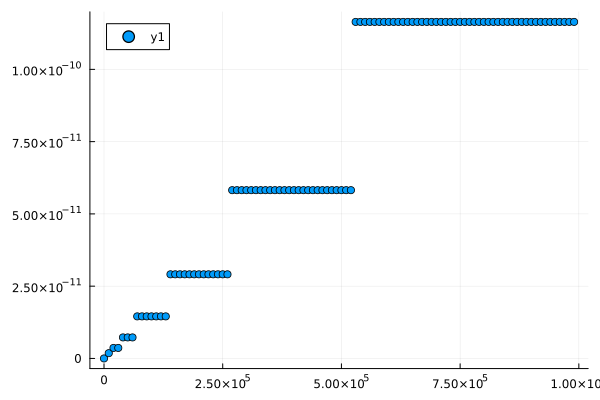

In [35]:
using Plots
scatter(eps,1.0:10000:1000000.0)

# Zadanie 3


Jedną z bibliotek numerycznych, jaką dodatkowo będziemy używać na zajęciach jest <a href="http://www.gnu.org/software/gsl/gsl.html">GSL</a> (język C). Opis <a href="https://www.gnu.org/software/gsl/doc/html/usage.html"> jak używać </a>. Korzystając ze <a href="https://www.gnu.org/software/gsl/doc/html/ieee754.html"> wsparcia dla wyświetlania reprezentacji liczb zmiennoprzecinkowych</a> zobaczyć jak zmienia się cecha i mantysa dla coraz mniejszych liczb. Zaobserwować, kiedy matysa przestaje być znormalizowana i dlaczego?

Kod załączyć jako komórka Markdown sformatowana jako C ([link](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#code)). Wynik także jako Markdown (kod albo fragment zrzutu ekranu).

```
#include <stdio.h>
#include <gsl/gsl_ieee_utils.h>


int main (void){

  float x = 1e-36;

  gsl_ieee_env_setup ();

  while (x > 0){
    x /= 2;
    gsl_ieee_printf_float(&x);
    printf("\n");
  }
  return 0;
}

 ```1.01010100010010000100101*2^-121
 1.01010100010010000100101*2^-122
 1.01010100010010000100101*2^-123
 1.01010100010010000100101*2^-124
 1.01010100010010000100101*2^-125
 1.01010100010010000100101*2^-126
 0.10101010001001000010010*2^-126
 0.01010101000100100001001*2^-126
 0.00101010100010010000100*2^-126
 0.00010101010001001000010*2^-126
 0.00001010101000100100001*2^-126
 0.00000101010100010010000*2^-126
 0.00000010101010001001000*2^-126
 0.00000001010101000100100*2^-126
 0.00000000101010100010010*2^-126
 0.00000000010101010001001*2^-126
 0.00000000001010101000100*2^-126
 0.00000000000101010100010*2^-126
 0.00000000000010101010001*2^-126
 0.00000000000001010101000*2^-126
 0.00000000000000101010100*2^-126
 0.00000000000000010101010*2^-126
 0.00000000000000001010101*2^-126
 0.00000000000000000101010*2^-126
 0.00000000000000000010101*2^-126
 0.00000000000000000001010*2^-126
 0.00000000000000000000101*2^-126
 0.00000000000000000000010*2^-126
 0.00000000000000000000001*2^-126
 0

Poniżej przedstawione zostało wyjście powyższego programu

Analizując powyższe wyniki możemy zaobserwować, że mantysa przestaje być znormalizowana po przekroczeniu zakresu cechy danej liczby

# Zadanie 4

Na przykładzie wybranego algorytmu niestabilnego numerycznie: 
1. Pokazać, że działa źle.
2. Pokazać które konkretnie działania powodują zwiększenie błędu (np. dzielenie przez małą liczbę, cancellation).
3. Zademonstować wersję stabilną.

Nie wolno pokazywać przykładów z wykładu (lub bardzo podobnych)!

Wszystkie punkty przedstawić w postaci notatnika Julii.

# Przykładem algorytmu niestabilnego numerycznie może być równanie kwadratowe 

Zaimplementowany poniżej algorytm unstable_quadratic jest przykładem algorytmu niestabilnego numerycznie. Co ciekawe tylko jeden z pierwiastków
zostanie obliczony z błędem. Dzieje się tak ponieważ błąd względny rachunku odejmowania liczb o dużej różnicy jest duży - mamy do czynienia 
z utratą cyfr znaczących. Jest to zatem błąd rodzaju cancellation.

In [6]:
function unstable_quadratic(a,b,c)
    
    delta = b^2 - 4*a*c

    if delta < 0 || a == 0 
        println("Wrong arguments")
        return
    end
    
    x1 = (-b + sqrt(delta))/(2*a)
    x2 = (-b -sqrt(delta))/(2*a)

    println("The value of first root is: ", x1)
    println("The value of second root is: ", x2)
end


unstable_quadratic (generic function with 1 method)

Poniżej zaimplementowano algorytm stable_quadratic, wykorzystujący wzory Viete'a.

In [36]:
function stable_quadratic(a,b,c)
    
    delta = b^2 - 4*a*c

    if delta < 0 || a == 0 
        println("Wrong arguments")
        return
    end

    q = (-b + sign(-b)*sqrt(delta)) / 2
    x1 = q / a
    x2 = c / q

    println("The value of first root is: ", x1)
    println("The value of second root is: ", x2)
end

stable_quadratic (generic function with 1 method)

In [37]:
println("unstable_quadratic function :")
unstable_quadratic(0.01, -1e12, 1e-16)
println("stable_quadratic function :")
stable_quadratic(0.01, -1e12, 1e-16)

unstable_quadratic function :
The value of first root is: 1.0e14
The value of second root is: 0.0
stable_quadratic function :
The value of first root is: 1.0e14
The value of second root is: 1.0e-28


Analizując wyniki powyższych algorytmów dla wprowadzonych danych możemy stwierdzić, że unstable_quadratic źle obliczył wartość
jednego z pierwiastków. W przypadku drugiego algorytmu, zwrócony wynik jest prawidłowy.